# Milestone 04
## “wiring” the ADC with the DAC and measuring latencies

### Descripción

En este primer hito comprobaremos la latencia de sonido en la ejecución de wire3. Esto lo llevaremos a cabo reprocuciendo un sonido, como un pequeño golpe a través del micrófono este se reproducirá en el ordenador y podremos calcular la latencia midiendo mediante el software Audacity el tiempo que separa los dos picos de la onda principal y la onda producida por el software wire3.

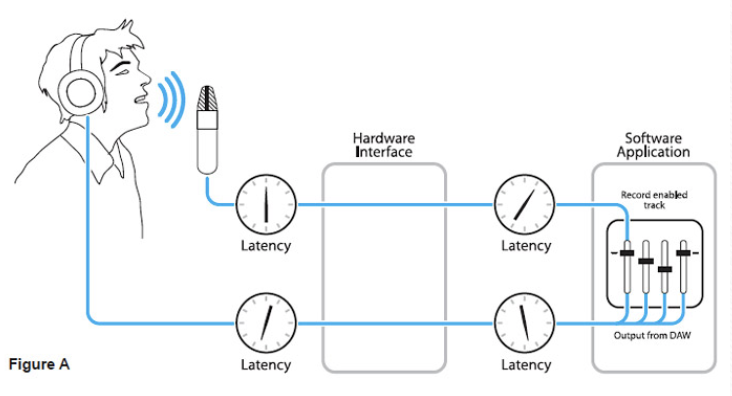

### Instalaciones

Para instalar el software y librerías necesarias utilizaremos los gestores de paquetes homebrew y anaconda 3. Son necesarios:
- Curl: Su uso principal se basa en la transferencia de archivos
- Sounddevice: Es un módulo de python que nos proporciona enlaces para la biblioteca portaudio.
- SoX: Es una herramienta de procesamiento de audio. En este caso la usaremos para la grabación de audio.
- Audacity: Es un sofware que se usa para la grabación y tratamiento de audio. En este caso la usaremos para llevar a cabo las mediciones de la latenccia en la ejecución de wire3.
- Matplotlib: Es una biblioteca mediante la cual se pueden generar gráficas en 2d y 3d. En este caso, la usaremos para la creación de la gráfica que mostrará la latencia frente al chunk_size.


### Ejecución

Para el desarrollo de esta practica llevaremos a cabo los siguientes pasos:
- Configuración de CHUNK_SIZE en wire3.py. (32, 64, 128, ..., 8192)
- Ejecutar wire3.py desde terminal.
- Ejecutar plot_input.py.
- Grabar sonido con SoX. (rec -r 8000 -c 1 test.wav).
- Repetir proceso.

### Análisis de datos

Despues de realizar la grabación mediante el comando (rec -r 8000 -c 1 test.wav), la abrimos con el sofware Audacity, el cual nos mostrará la onda de sonido capturada. Esta onda constará de un pico principal, al cual le seguirán varios picos secundarios producidos por el sotware wire3. El tiempo transcurrido entre los dos primeros picos será la latencia de uso del software wire3.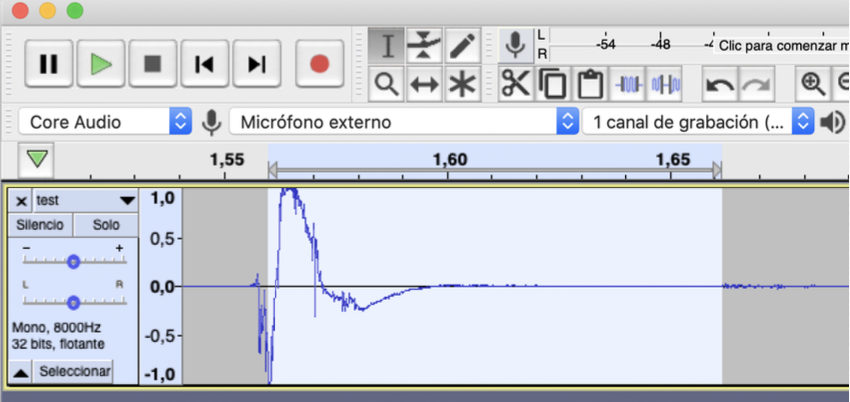

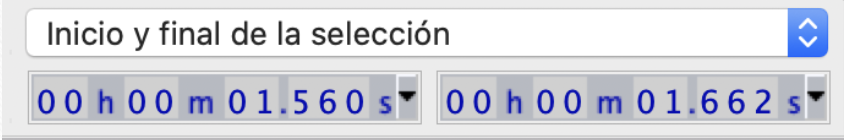

### Creación de tablas

Para la creación de la tabla en la cual se ve reflejada la latencia del software wire3, hemos creado un archivo ASCII el cual separadas mediante tabulaciones contiene tres columnas, una con el chunk_size, otra con la latencia obtenida en milisegundos y una tercera con la latencia minima teorica.

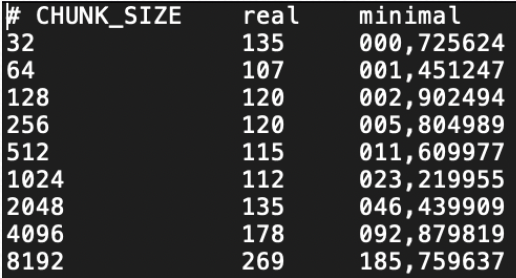

Una vez creado el archivo ASCII, mediante la ejecución de gnuplot generamos la gráfica latencia frente a chunk_size del siguiente modo:

In [ ]:
echo "set terminal pdf; set output 'latency_vs_chunk_size.pdf'; set xlabel 'CHUNK\_SIZE (frames)'; set ylabel 'Latency (miliseconds)'; set key left; plot 'latency_vs_chunk_size.txt' using 1:2 title 'Real' with linespoints, 'latency_vs_chunk_size.txt' using 1:3 title 'Minimal' with linespoints" | gnuplot

En esta grafica se representan mediante dos lineas la latencia practica de nuestro ordenador(morado) y la latencia teorica(verde).

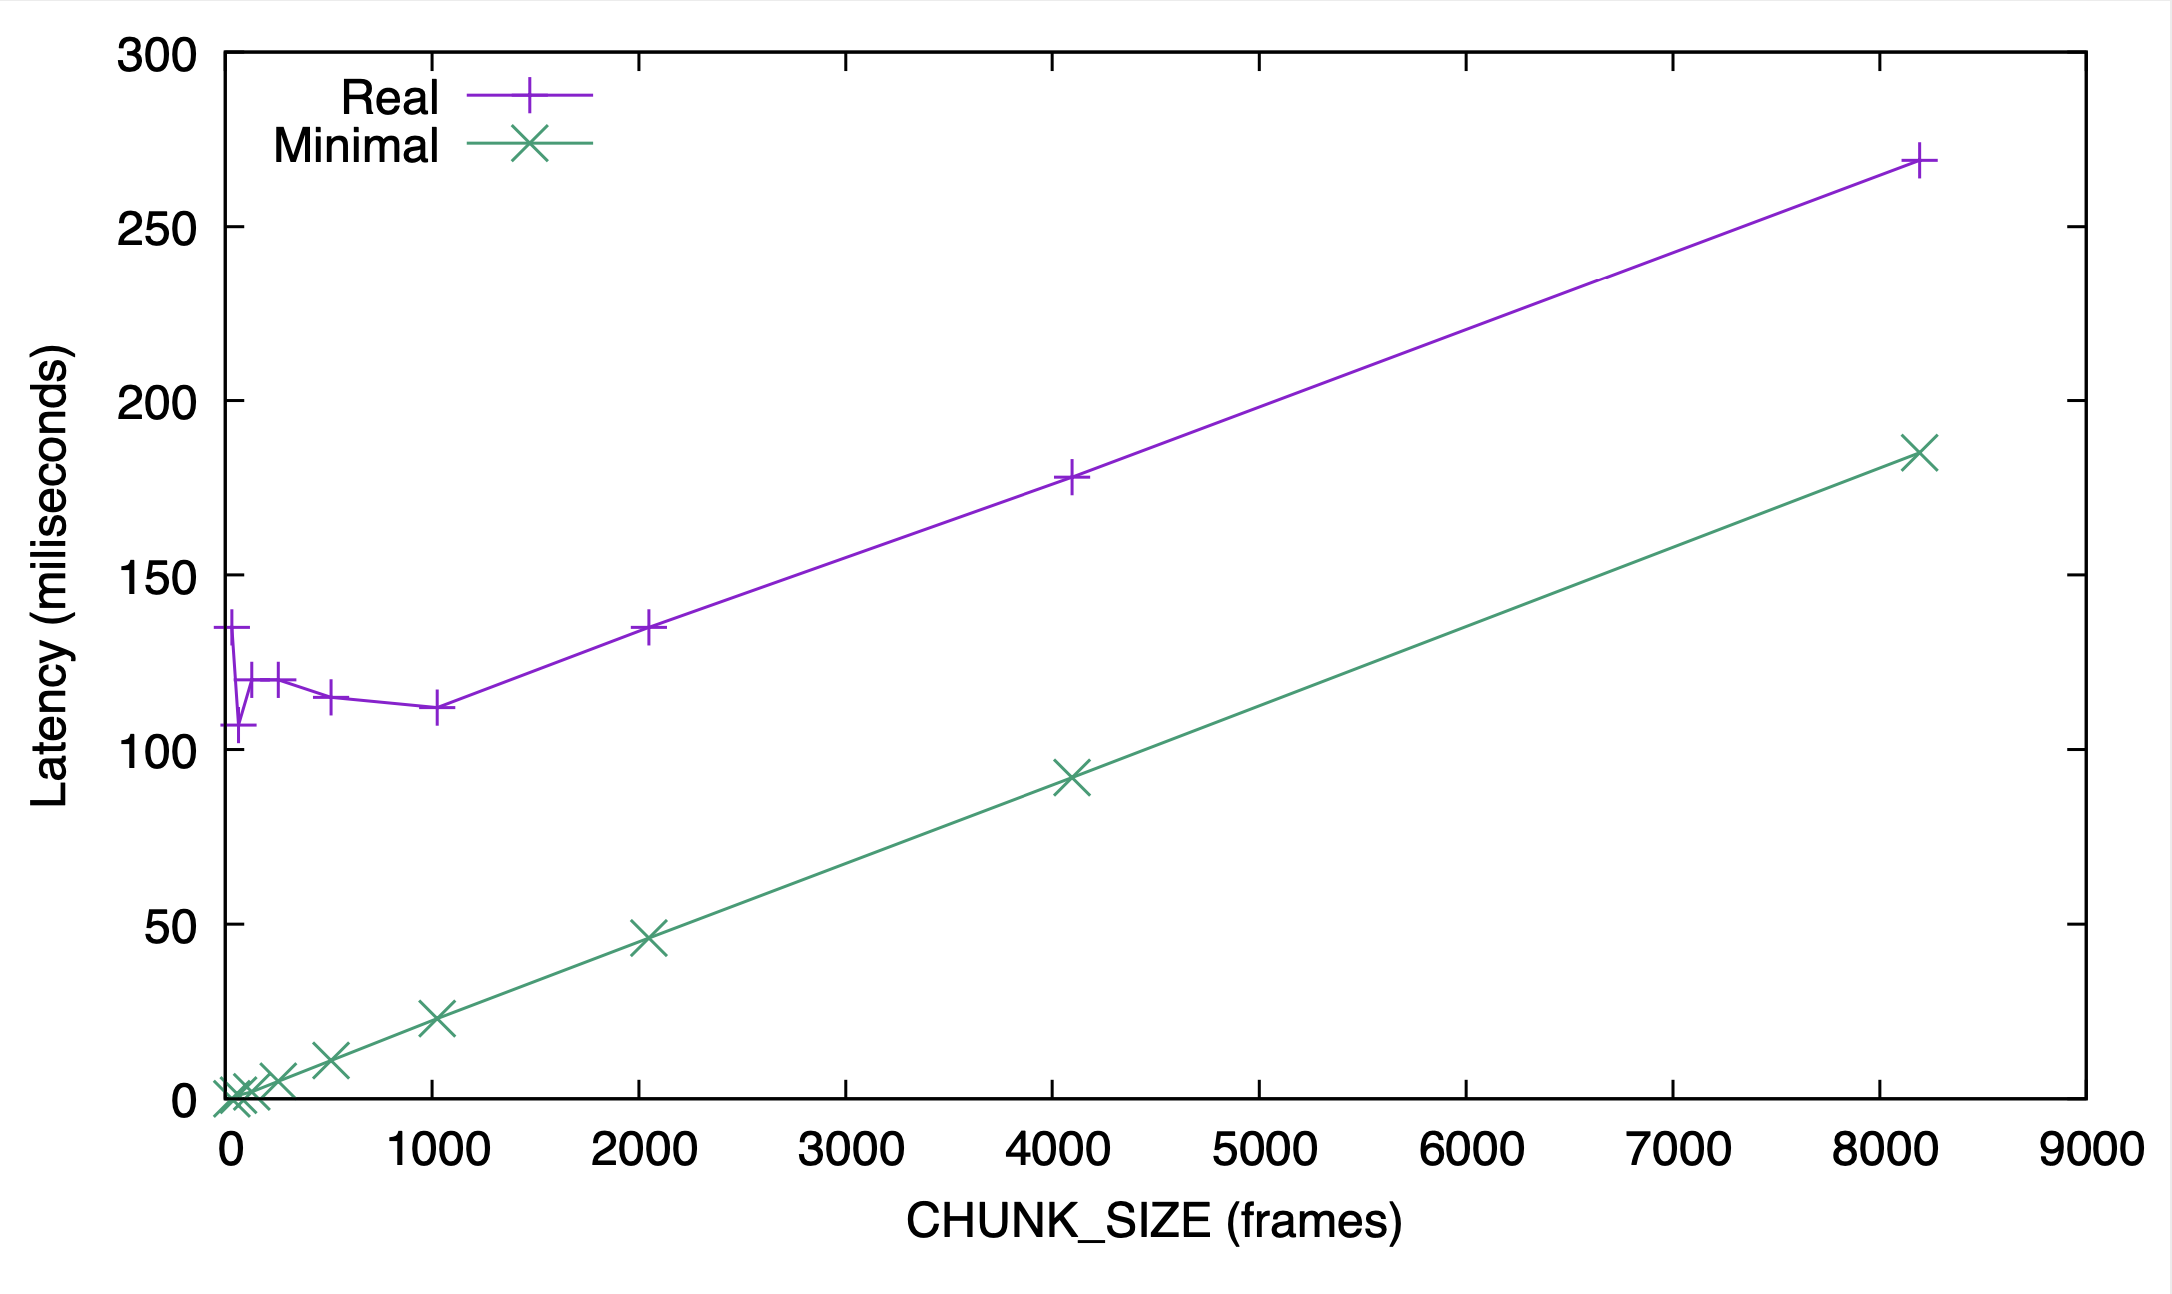

### Latencia minima practica

La latencia práctica mínima en nuestro ordenador es aproximadamente 107 milisegundos. Esta latencia la obtenemos con un chunk_size de 64 bytes. En el caso de un chunk_size de 1 byte, la latencia obtenida es de 120 milisegundos, esto es debido a que valores muy pequeños del chunk_size penalizan al proceso relentizandolo sustancialmente, cuando la latenia teorica debería ser practicamente nula. En el caso de no tener preocupaciones en cuanto al uso de la memoria se podría utilizar un valor de chunk_size alto, como por ejemplo valores entre 1MB y 10MB.